# Movie review classification with NLTK

In [1]:
import random
import nltk
from nltk import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cats = movie_reviews.categories()
reviews = []
for cat in cats:
    for fid in movie_reviews.fileids(cat):
        review = (list(movie_reviews.words(fid)),cat)
        reviews.append(review)
random.shuffle(reviews)

In [2]:
all_wd_in_reviews = nltk.FreqDist(wd.lower() for wd in movie_reviews.words())
top_wd_in_reviews = [list(wds) for wds in zip(*all_wd_in_reviews.most_common(2000))][0]

In [10]:
def ext_ft(review,top_words):
    review_wds = set(review)
    ft = {}
    for wd in top_words:
        ft['word_present({})'.format(wd)] = (wd in review_wds)
    return ft

In [11]:
featuresets = [(ext_ft(d,top_wd_in_reviews), c) for (d,c) in reviews]
train_set, test_set = featuresets[200:], featuresets[:200]

In [12]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.81


In [16]:
len(featuresets)

2000

In [18]:
classifier.show_most_informative_features(20)

Most Informative Features
word_present(outstanding) = True              pos : neg    =     10.2 : 1.0
    word_present(seagal) = True              neg : pos    =      7.3 : 1.0
     word_present(mulan) = True              pos : neg    =      7.1 : 1.0
word_present(wonderfully) = True              pos : neg    =      6.8 : 1.0
     word_present(damon) = True              pos : neg    =      6.8 : 1.0
     word_present(awful) = True              neg : pos    =      5.8 : 1.0
    word_present(wasted) = True              neg : pos    =      5.6 : 1.0
     word_present(waste) = True              neg : pos    =      5.2 : 1.0
     word_present(worst) = True              neg : pos    =      5.2 : 1.0
      word_present(lame) = True              neg : pos    =      5.1 : 1.0
      word_present(jedi) = True              pos : neg    =      5.1 : 1.0
     word_present(flynt) = True              pos : neg    =      5.1 : 1.0
    word_present(poorly) = True              neg : pos    =      5.0 : 1

In [19]:
dict_vectorizer=None
def get_train_test(train_set,test_set):
    global dict_vectorizer
    dict_vectorizer = DictVectorizer(sparse=False)
    X_train, y_train = zip(*train_set)
    X_train = dict_vectorizer.fit_transform(X_train)
    X_test,y_test = zip(*test_set)
    X_test = dict_vectorizer.transform(X_test)
    return X_train,X_test,y_train,y_test

In [20]:
X_train,X_test,y_train,y_test = get_train_test(train_set,test_set)
rf = RandomForestClassifier(n_estimators=100,n_jobs=4,random_state=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [21]:
preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))

0.83


In [22]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
all_words_in_reviews = nltk.FreqDist(word.lower() for word in movie_reviews.words() if word not in stopwords_list)
top_words_in_reviews = [list(words) for words in zip(*all_words_in_reviews.most_common(2000))][0]

In [23]:
featuresets = [(ext_ft(d,top_words_in_reviews), c) for (d,c) in reviews]
train_set, test_set = featuresets[200:], featuresets[:200]
X_train,X_test,y_train,y_test = get_train_test(train_set,test_set)

In [24]:
rf = RandomForestClassifier(n_estimators=100,n_jobs=4,random_state=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [25]:
preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))

0.79


In [26]:
features_list = zip(dict_vectorizer.get_feature_names(),rf.feature_importances_)
features_list = sorted(features_list, key=lambda x: x[1], reverse=True)
print(features_list[0:20])

[('word_present(bad)', 0.014504915347063115), ('word_present(worst)', 0.00781698617729744), ('word_present(boring)', 0.006440386679346596), ('word_present(awful)', 0.006127115377494099), ('word_present(stupid)', 0.005471505038877159), ('word_present(waste)', 0.005170146661910842), ('word_present(life)', 0.004938249191596074), ('word_present(ridiculous)', 0.00416908111985326), ('word_present(supposed)', 0.0038578162254646058), ('word_present(plot)', 0.003840788717837618), ('word_present(hilarious)', 0.0037941646475079917), ('word_present(others)', 0.0037741640574118574), ('word_present(many)', 0.0037195066360593905), ('word_present(memorable)', 0.0035374082468082727), ('word_present(lame)', 0.0035162815841992333), ('word_present(wasted)', 0.0034659801317003247), ('word_present(excellent)', 0.0034651221876305523), ('word_present(outstanding)', 0.0034202105597824837), ('word_present(script)', 0.003345230531195553), ('word_present(perfect)', 0.0032626519600788425)]


# Training a Parts of speech tagger using NLTK tree bank data set

In [27]:
import nltk
import numpy as np
from nltk import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def sentence_features(st, ix):
    d_ft = {}
    d_ft['word'] = st[ix]
    d_ft['dist_from_first'] = ix - 0
    d_ft['dist_from_last'] = len(st) - ix
    d_ft['capitalized'] = st[ix][0].upper() == st[ix][0]
    d_ft['prefix1'] = st[ix][0]
    d_ft['prefix2'] = st[ix][:2]
    d_ft['prefix3'] = st[ix][:3]
    d_ft['suffix1'] = st[ix][-1]
    d_ft['suffix2'] = st[ix][-2:]
    d_ft['suffix3'] = st[ix][-3:]
    d_ft['prev_word'] = '' if ix==0 else st[ix-1]
    d_ft['next_word'] = '' if ix==(len(st)-1) else st[ix+1]
    d_ft['numeric'] = st[ix].isdigit()
    return d_ft

In [28]:
def get_untagged_sentence(tagged_sentence):
    [s,t] = zip(*tagged_sentence)
    return list(s)

In [29]:
tagged_sentences = nltk.corpus.treebank.tagged_sents(tagset='universal')

In [30]:
def ext_ft(tg_sent):
    sent, tag = [], []
 
    for tg in tg_sent:
        for index in range(len(tg)):
            sent.append(sentence_features(get_untagged_sentence(tg), index))
            tag.append(tg[index][1])
 
    return sent, tag

In [39]:
X,y = ext_ft(tagged_sentences)

n_sample = 5000
dict_vectorizer = DictVectorizer(sparse=False)
X_transformed = dict_vectorizer.fit_transform(X[0:n_sample])
y_sampled = y[0:n_sample]

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed, y_sampled, test_size=0.2, random_state=123)

In [41]:
def predict_pos_tags(sentence):
    tagged_sentence = []
    features = [sentence_features(sentence, index) for index in range(len(sentence))]
    features = dict_vectorizer.transform(features)
    tags = rf.predict(features)
    return zip(sentence, tags)

In [48]:
import nltk
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [50]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [51]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [53]:
# we look up the word monstrous in Moby Dick... by entering text1 
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [54]:
#simply counts the number of unique contexts the words share.
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [58]:
text1.similar("beautiful")

by coat heart body brain world hand whale fish word arched dictionary
more dut dutch english french devil long street


In [60]:
# The term common_contexts allows us to examine just the contexts that are shared by two or more words, such as monstrous and very
text2.common_contexts(["monstrous", "very"])

a_pretty am_glad a_lucky is_pretty be_glad


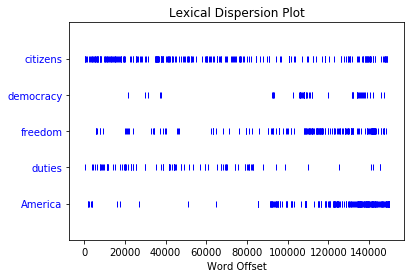

In [62]:
# beginning it appears. This positional of location of a word in the text  can be displayed using a dispersion plot
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

In [72]:
# let's try generating some random text in the various styles we have just seen
len(text1)

260819

In [73]:
len(text1)

260819

In [74]:
len(set(text1))

19317

In [85]:
(sorted(set(text3)))[1:20]

["'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech']

In [86]:
len(set(text3)) / len(text3)

0.06230453042623537

In [87]:
text3.count("smote")

5

In [88]:
100 * text4.count('a') / len(text4)

1.457973123627309

In [89]:
def lexical_diversity(text): return len(set(text)) / len(text)

def percentage(count, total): return 100 * count / total

In [90]:
lexical_diversity(text3)

0.06230453042623537

In [91]:
lexical_diversity(text5)

0.13477005109975562

## List

In [92]:
sent1 = ['Call', 'me', 'Ishmael', '.']

In [93]:
sent1

['Call', 'me', 'Ishmael', '.']

In [94]:
len(sent1)

4

In [95]:
lexical_diversity(sent1)

1.0

In [96]:
sent2 = ['The', 'family', 'of', 'Dashwood', 'had', 'long','been', 'settled', 'in', 'Sussex', '.']
sent3 = ['In', 'the', 'beginning', 'God', 'created', 'the','heaven', 'and', 'the', 'earth', '.']

In [97]:
# concatenation; it combines the lists together into a single list
sent2 + sent3

['The',
 'family',
 'of',
 'Dashwood',
 'had',
 'long',
 'been',
 'settled',
 'in',
 'Sussex',
 '.',
 'In',
 'the',
 'beginning',
 'God',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth',
 '.']

What if we want to add a single item to a list? This is known as appending. When we append() to a list, the list itself
is updated as a result of the operation.

In [98]:
sent1.append("Some")
sent1

['Call', 'me', 'Ishmael', '.', 'Some']

## Indexing Lists

We instruct Python to show us the item that occurs at an index such as 173 in a text by writing the
name of the text followed by the index inside square brackets:

In [99]:
text4[173]

'awaken'

We can do the converse: Give a word then retrieve the index in the given text

In [101]:
text4.index('awaken')

173

Python permits us to access sublists as well, extracting manageable pieces of language from large texts, a technique known as slicing.

In [102]:
text3[16000:16020]

['Gaham',
 ',',
 'and',
 'Thahash',
 ',',
 'and',
 'Maachah',
 '.',
 'And',
 'Sarah',
 'was',
 'an',
 'hundred',
 'and',
 'seven',
 'and',
 'twenty',
 'years',
 'old',
 ':']

In [105]:
# print all the elements of list from index 3 to the end 
text1[3:]
#  print 2 first elements of list
text1[:3]

['[', 'Moby', 'Dick']

## Variable

In [109]:
my_variable  = text1[3:23]

In [111]:
len(sorted(my_variable))

20

## String

In [112]:
student = 'Henry'

In [113]:
student*2

'HenryHenry'

In [115]:
student + '!'

'Henry!'

We can join the words of a list to make a single string, or split a string into a list, as follows:

In [117]:
' '.join(['student','teacher'])

'student teacher'

In [118]:
'student teacher'.split()

['student', 'teacher']

# Computing with Language: Simple Statistics

## Frequency Distributions

In [120]:
dist = FreqDist(text3)
print(dist)

dist.most_common(50)

<FreqDist with 2789 samples and 44764 outcomes>


[(',', 3681),
 ('and', 2428),
 ('the', 2411),
 ('of', 1358),
 ('.', 1315),
 ('And', 1250),
 ('his', 651),
 ('he', 648),
 ('to', 611),
 (';', 605),
 ('unto', 590),
 ('in', 588),
 ('that', 509),
 ('I', 484),
 ('said', 476),
 ('him', 387),
 ('a', 342),
 ('my', 325),
 ('was', 317),
 ('for', 297),
 ('it', 290),
 ('with', 289),
 ('me', 282),
 ('thou', 272),
 ("'", 268),
 ('is', 267),
 ('thy', 267),
 ('s', 263),
 ('thee', 257),
 ('be', 254),
 ('shall', 253),
 ('they', 249),
 ('all', 245),
 (':', 238),
 ('God', 231),
 ('them', 230),
 ('not', 224),
 ('which', 198),
 ('father', 198),
 ('will', 195),
 ('land', 184),
 ('Jacob', 179),
 ('came', 177),
 ('her', 173),
 ('LORD', 166),
 ('were', 163),
 ('she', 161),
 ('from', 157),
 ('Joseph', 157),
 ('their', 153)]

In [121]:
dist['land']

184

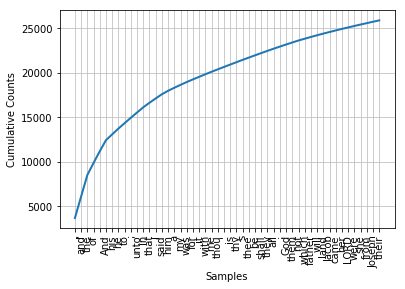

In [122]:
#We can generate a cumulative frequency plot for these words, using 
dist.plot(50, cumulative=True)

In [124]:
V = set(text1)
long_words = [w for w in V if len(w) > 18]
sorted(long_words)

['uninterpenetratingly']

In [127]:
fdist5 = FreqDist(text5)
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

Notice how we have used two conditions: len(w) > 7 ensures that the words are longer than seven letters, and
fdist5[w] > 7 ensures that these words occur more than seven times. At last we have managed to automatically
identify the frequently-occurring content-bearing words of the text. It is a modest but important milestone: a tiny piece
of code, processing tens of thousands of words, produces some informative output.

## Collocations and Bigrams

A collocation is a sequence of words that occur together unusually often. Thus red wine is a collocation, whereas the
wine is not. A characteristic of collocations is that they are resistant to substitution with words that have similar
senses; for example, maroon wine sounds definitely odd.
To get a handle on collocations, we start off by extracting from a text a list of word pairs, also known as bigrams. This
is easily accomplished with the function bigrams():


In [129]:
list(bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

 we want to find bigrams that occur more often than we would expect based on the frequency
of the individual words. The collocations() function does this for us

In [131]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; God
bless; Chief Justice; Old World; Almighty God; Fellow citizens; Chief
Magistrate; every citizen; one another; fellow Americans; Indian
tribes; public debt; foreign nations


## Counting Other Things
we can look at the distribution of word lengths in a text, as illustrated in the following example

In [132]:
[len(w) for w in text1]

fdist = FreqDist(len(w) for w in text1)


fdist


FreqDist({3: 50223, 1: 47933, 4: 42345, 2: 38513, 5: 26597, 6: 17111, 7: 14399, 8: 9966, 9: 6428, 10: 3528, ...})

In [133]:
fdist.most_common()

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528),
 (11, 1873),
 (12, 1053),
 (13, 567),
 (14, 177),
 (15, 70),
 (16, 22),
 (17, 12),
 (18, 1),
 (20, 1)]

In [134]:
fdist.max()

3

In [135]:
fdist[3]

50223

In [136]:
fdist.freq(3)

0.19255882431878046

From this we see that the most frequent word length is 3, and that words of length 3 account for roughly 50,000 (or
20%) of the words making up the book. Although we will not pursue it here, further analysis of word length might
help us understand differences between authors, genres, or languages.

# Making Decisions and Taking Control

In [137]:
[w for w in sent7 if len(w) < 4]

[',', '61', 'old', ',', 'the', 'as', 'a', '29', '.']

In [138]:
[w for w in sent7 if len(w) <= 4]

[',', '61', 'old', ',', 'will', 'join', 'the', 'as', 'a', 'Nov.', '29', '.']

In [139]:
[w for w in sent7 if len(w) == 4]

['will', 'join', 'Nov.']

In [140]:
[w for w in sent7 if len(w) != 4]

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 '29',
 '.']

In [141]:
sorted(w for w in set(text1) if w.endswith('ableness'))

['comfortableness',
 'honourableness',
 'immutableness',
 'indispensableness',
 'indomitableness',
 'intolerableness',
 'palpableness',
 'reasonableness',
 'uncomfortableness']

In [142]:
sorted(term for term in set(text4) if 'gnt' in term)

['Sovereignty', 'sovereignties', 'sovereignty']

In [145]:
sorted(item for item in set(text6) if item.istitle())[1:20]

['Aaaaaaaaah',
 'Aaaaaaaah',
 'Aaaaaah',
 'Aaaah',
 'Aaaaugh',
 'Aaagh',
 'Aaah',
 'Aaauggh',
 'Aaaugh',
 'Aaauugh',
 'Aagh',
 'Aah',
 'Aauuggghhh',
 'Aauuugh',
 'Aauuuuugh',
 'Aauuuves',
 'Action',
 'Actually',
 'African']

In [146]:
sorted(item for item in set(sent7) if item.isdigit())

['29', '61']

In [147]:
sorted(w for w in set(text7) if '-' in w and 'index' in w)


['Stock-index',
 'index-arbitrage',
 'index-fund',
 'index-options',
 'index-related',
 'stock-index']

In [148]:
sorted(wd for wd in set(text3) if wd.istitle() and len(wd) > 10)


['Abelmizraim',
 'Allonbachuth',
 'Beerlahairoi',
 'Canaanitish',
 'Chedorlaomer',
 'Girgashites',
 'Hazarmaveth',
 'Hazezontamar',
 'Ishmeelites',
 'Jegarsahadutha',
 'Jehovahjireh',
 'Kirjatharba',
 'Melchizedek',
 'Mesopotamia',
 'Peradventure',
 'Philistines',
 'Zaphnathpaaneah']

In [149]:
sorted(w for w in set(sent7) if not w.islower())


[',', '.', '29', '61', 'Nov.', 'Pierre', 'Vinken']

In [150]:
sorted(t for t in set(text2) if 'cie' in t or 'cei' in t)

['ancient',
 'ceiling',
 'conceit',
 'conceited',
 'conceive',
 'conscience',
 'conscientious',
 'conscientiously',
 'deceitful',
 'deceive',
 'deceived',
 'deceiving',
 'deficiencies',
 'deficiency',
 'deficient',
 'delicacies',
 'excellencies',
 'fancied',
 'insufficiency',
 'insufficient',
 'legacies',
 'perceive',
 'perceived',
 'perceiving',
 'prescience',
 'prophecies',
 'receipt',
 'receive',
 'received',
 'receiving',
 'society',
 'species',
 'sufficient',
 'sufficiently',
 'undeceive',
 'undeceiving']

## Operating on Every Element

In [152]:
[len(w) for w in text1][1:20]

[4, 4, 2, 6, 8, 4, 1, 9, 1, 1, 8, 2, 1, 4, 11, 5, 2, 1, 7]

In [154]:
[w.upper() for w in text1][1:20]

['MOBY',
 'DICK',
 'BY',
 'HERMAN',
 'MELVILLE',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'SUPPLIED',
 'BY',
 'A',
 'LATE',
 'CONSUMPTIVE',
 'USHER',
 'TO',
 'A',
 'GRAMMAR']

In [155]:
len(set(word.lower() for word in text1))

17231

Now that we are not double-counting words like This and this, which differ only in capitalization, we've wiped 2,000
off the vocabulary count! We can go a step further and eliminate numbers and punctuation from the vocabulary count
by filtering out any non-alphabetic items:

In [156]:
len(set(word.lower() for word in text1 if word.isalpha()))

16948

## Nested Code Blocks

In [159]:
for word in ['Call', 'me', 'Hero', '.']:print(word)

Call
me
Hero
.


## Looping with Conditions

we can combine the if and for statements. We will loop over every item of the list, and print the item only if it
ends with the letter l. We'll pick another name for the variable to demonstrate that Python doesn't try to make sense of
variable names.

In [162]:
sent1 = ['Call', 'me', 'Hero', '.']
for xyzzy in sent1:
    if xyzzy.endswith('l'):
        print(xyzzy)

Call


We can also specify an action to be taken if the condition of the if statement is not met. Here we see the elif (else if)
statement, and the else statement. Notice that these also have colons before the indented code.

In [164]:
 for token in sent1:
    if token.islower():
        print(token, 'is a lowercase word')    
        
        
    elif token.istitle():
        print(token, 'is a titlecase word')
    else:
        print(token, 'is punctuation')

Call is a titlecase word
me is a lowercase word
Hero is a titlecase word
. is punctuation


In [166]:
tricky = sorted(w for w in set(text2) if 'tion' in w or 'cian' in w)
for word in tricky:
    print(word, end=' ')

Conversation Grecian Opposition Preparation Prescriptions Reflection abstraction accommodation accommodations accusation acquisition action actions addition additional additions admiration affectation affection affectionate affectionately affections affliction afflictions aggravation agitation alleviation alteration alterations ambition animation annihilation anticipation anticipations application approbation articulation assertion assertions attention attentions attraction attractions calculation caution celebration cessation circumspection collation collection commendation commiseration communication completion composition compunction conciliation condemnation condition conditioned conditions confirmation congratulations connection connections consideration considerations consolation consternation constitution constitutional construction consultation consumption continuation contraction contribution contrition conversation conversations conviction creation deception declaration dejec

### Functions Defined for NLTK's Frequency Distributions
|Example |Description|
| --- | --- |
|fdist = FreqDist(samples) |create a frequency distribution containing the given samples|
|fdist[sample] += 1 |increment the count for this sample|
|fdist['monstrous'] |count of the number of times a given sample occurred|
|fdist.freq('monstrous') |frequency of a given sample|
|fdist.N() |total number of samples|
|fdist.most_common(n) |the n most common samples and their frequencies|
|for sample in fdist: |iterate over the samples|
|fdist.max() |sample with the greatest count|
|fdist.tabulate() |tabulate the frequency distribution|
|fdist.plot() |graphical plot of the frequency distribution|
|fdist.plot(cumulative=True) |cumulative plot of the frequency distribution|
|fdist1 |= fdist2 |update fdist1 with counts from fdist2|
|fdist1 < fdist2 |test if samples in fdist1 occur less frequently than in fdist2|

# Automatic Natural Language Understanding

## Word Sense Disambiguation

In word sense disambiguation we want to work out which sense of a word was intended in a given context. Consider
the ambiguous words serve and dish:
- serve: help with food or drink; hold an office; put ball into play 
- dish: plate; course of a meal; communications device

In a sentence containing the phrase: he served the dish, you can detect that both serve and dish are being used with
their food meanings. It's unlikely that the topic of discussion shifted from sports to crockery in the space of three
words. This would force you to invent bizarre images, like a tennis pro taking out his or her frustrations on a china teaset laid out beside the court. In other words, we automatically disambiguate words using context, exploiting the simple
fact that nearby words have closely related meanings. As another example of this contextual effect, consider the word
by, which has several meanings, e.g.: the book by Chesterton (agentive — Chesterton was the author of the book); the
cup by the stove (locative — the stove is where the cup is); and submit by Friday (temporal — Friday is the time of the
submitting). Observe in (3c) that the meaning of the italicized word helps us interpret the meaning of by.

3. 
- The lost children were found by the searchers (agentive)
- The lost children were found by the mountain (locative)
- The lost children were found by the afternoon (temporal)

## Pronoun Resolution

A deeper kind of language understanding is to work out "who did what to whom" — i.e., to detect the subjects and
objects of verbs. You learnt to do this in elementary school, but it's harder than you might think. In the sentence the
thieves stole the paintings it is easy to tell who performed the stealing action. Consider three possible following
sentences in (4c), and try to determine what was sold, caught, and found (one case is ambiguous).


4. 

- The thieves stole the paintings. They were subsequently sold.
- The thieves stole the paintings. They were subsequently caught.
- The thieves stole the paintings. They were subsequently found.
Answering this question involves finding the antecedent of the pronoun they, either thieves or paintings.
Computational techniques for tackling this problem include anaphora resolution — identifying what a pronoun or
noun phrase refers to — and semantic role labeling — identifying how a noun phrase relates to the verb (as agent,
patient, instrument, and so on).



## Generating Language Output
If we can automatically solve such problems of language understanding, we will be able to move on to tasks that
involve generating language output, such as question answering and machine translation. In the first case, a
machine should be able to answer a user's questions relating to collection of texts:



5

- Text: ... The thieves stole the paintings. They were subsequently sold. ...
- Human: Who or what was sold?
- Machine: The paintings.
The machine's answer demonstrates that it has correctly worked out that they refers to paintings and not to thieves. In
the second case, the machine should be able to translate the text into another language, accurately conveying the
meaning of the original text. In translating the example text into French, we are forced to choose the gender of the
pronoun in the second sentence: ils (masculine) if the thieves are found, and elles (feminine) if the paintings are found.
Correct translation actually depends on correct understanding of the pronoun.

6 
- The thieves stole the paintings. They were subsequently found.
- Les voleurs ont volé les peintures. Ils ont été trouvés plus tard. (the thieves)
- Les voleurs ont volé les peintures. Elles ont été trouvées plus tard. (the paintings)
In all of these examples, working out the sense of a word, the subject of a verb, and the antecedent of a pronoun are
steps in establishing the meaning of a sentence, things we would expect a language understanding system to be able to
do.

## Machine translation

## Dialogue

## Limitations of NLP
Despite the research-led advances in tasks like RTE, natural language systems that have been deployed for real-world
applications still cannot perform common-sense reasoning or draw on world knowledge in a general and robust
manner. We can wait for these difficult artificial intelligence problems to be solved, but in the meantime it is necessary
to live with some severe limitations on the reasoning and knowledge capabilities of natural language systems.
Accordingly, right from the beginning, an important goal of NLP research has been to make progress on the difficult
task of building technologies that "understand language," using superficial yet powerful techniques instead of
unrestricted knowledge and reasoning capabilities. Indeed, this is one of the goals of this book, and we hope to equip
you with the knowledge and skills to build useful NLP systems, and to contribute to the long-term aspiration of
building intelligent machines.

# Accessing Text Corpora and Lexical Resources

Practical work in Natural Language Processing typically uses large bodies of linguistic data, or **corpora**. 

We begin by getting the Python interpreter to load the NLTK
package, then ask to see nltk.corpus.gutenberg.fileids(), the file identifiers in this corpus:

In [168]:
import nltk
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [169]:
sense = nltk.corpus.gutenberg.words('austen-sense.txt')
len(sense)

141576

In [170]:
sense = nltk.Text(nltk.corpus.gutenberg.words('austen-sense.txt'))
sense.concordance("surprize")

no matches


In [171]:
from nltk.corpus import gutenberg
gutenberg.fileids()


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [172]:
sense = gutenberg.words('austen-sense.txt')

In [173]:
len(sense)

141576

Let's write a short program to display other information about each text, by looping over all the values of fileid
corresponding to the gutenberg file identifiers listed earlier and then computing statistics for each text. For a compact
output display, we will round each number to the nearest integer, using round().

In [174]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


This program displays three statistics for each text: average word length, average sentence length, and the number of
times each vocabulary item appears in the text on average (our lexical diversity score). Observe that average word length
appears to be a general property of English, since it has a recurrent value of 4. (In fact, the average word length is really 3
not 4, since the num_chars variable counts space characters.) By contrast average sentence length and lexical diversity
appear to be characteristics of particular authors.
The previous example also showed how we can access the "raw" text of the book , not split up into tokens. The raw()
function gives us the contents of the file without any linguistic processing. So, for example,
len(gutenberg.raw('blake-poems.txt')) tells us how many letters occur in the text, including the spaces between words.
The sents() function divides the text up into its sentences, where each sentence is a list of words:

In [175]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [180]:
longest_len = max(len(s) for s in macbeth_sentences)
[s for s in macbeth_sentences if len(s) == longest_len]

[['Doubtfull',
  'it',
  'stood',
  ',',
  'As',
  'two',
  'spent',
  'Swimmers',
  ',',
  'that',
  'doe',
  'cling',
  'together',
  ',',
  'And',
  'choake',
  'their',
  'Art',
  ':',
  'The',
  'mercilesse',
  'Macdonwald',
  '(',
  'Worthie',
  'to',
  'be',
  'a',
  'Rebell',
  ',',
  'for',
  'to',
  'that',
  'The',
  'multiplying',
  'Villanies',
  'of',
  'Nature',
  'Doe',
  'swarme',
  'vpon',
  'him',
  ')',
  'from',
  'the',
  'Westerne',
  'Isles',
  'Of',
  'Kernes',
  'and',
  'Gallowgrosses',
  'is',
  'supply',
  "'",
  'd',
  ',',
  'And',
  'Fortune',
  'on',
  'his',
  'damned',
  'Quarry',
  'smiling',
  ',',
  'Shew',
  "'",
  'd',
  'like',
  'a',
  'Rebells',
  'Whore',
  ':',
  'but',
  'all',
  "'",
  's',
  'too',
  'weake',
  ':',
  'For',
  'braue',
  'Macbeth',
  '(',
  'well',
  'hee',
  'deserues',
  'that',
  'Name',
  ')',
  'Disdayning',
  'Fortune',
  ',',
  'with',
  'his',
  'brandisht',
  'Steele',
  ',',
  'Which',
  'smoak',
  "'",
  'd',
 

## Web and Chat Text
Although Project Gutenberg contains thousands of books, it represents established literature. It is important to consider
less formal language as well. NLTK's small collection of web text includes content from a Firefox discussion forum,
conversations overheard in New York, the movie script of Pirates of the Carribean, personal advertisements, and wine
reviews:

In [182]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [183]:
from IPython.display import HTML, display
import tabulate
table = [["Sun",696000,1989100000],
         ["Earth",6371,5973.6],
         ["Moon",1737,73.5],
         ["Mars",3390,641.85]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Sun,696000,1.9891e+09
Earth,6371,5973.6
Moon,1737,73.5
Mars,3390,641.85


### Functions Defined for NLTK's Frequency Distributions
|Example |Description|
| --- | --- |
|fdist = FreqDist(samples) |create a frequency distribution containing the given samples|
|fdist[sample] += 1 |increment the count for this sample|
|fdist['monstrous'] |count of the number of times a given sample occurred|
|fdist.freq('monstrous') |frequency of a given sample|
|fdist.N() |total number of samples|
|fdist.most_common(n) |the n most common samples and their frequencies|
|for sample in fdist: |iterate over the samples|
|fdist.max() |sample with the greatest count|
|fdist.tabulate() |tabulate the frequency distribution|
|fdist.plot() |graphical plot of the frequency distribution|
|fdist.plot(cumulative=True) |cumulative plot of the frequency distribution|
|fdist1 |= fdist2 |update fdist1 with counts from fdist2|
|fdist1 < fdist2 |test if samples in fdist1 occur less frequently than in fdist2|

The corpus is organized into 15 files, where each file contains several hundred posts collected on a given
date, for an age-specific chatroom (teens, 20s, 30s, 40s, plus a generic adults chatroom). The filename contains the date,
chatroom, and number of posts; e.g., 10-19-20s_706posts.xml contains 706 posts gathered from the 20s chat room on
10/19/2006.

In [184]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[123]

['i',
 'do',
 "n't",
 'want',
 'hot',
 'pics',
 'of',
 'a',
 'female',
 ',',
 'I',
 'can',
 'look',
 'in',
 'a',
 'mirror',
 '.']

## Brown Corpus
The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. This
corpus contains text from 500 sources, and the sources have been categorized by genre, such as news, editorial, and so
on. 1.1 gives an example of each genre (for a complete list, see http://icame.uib.no/brown/bcm-los.html).

### Example Document for Each Section of the Brown Corpus

| ID  | File | Genre | Description |
| --  | -- | --  | -- | 
| A16 | ca16 | news | Chicago Tribune: Society Reportage |
| B02 | cb02 | editorial | Christian Science Monitor: Editorial |
| C17 | cc17 | reviews | Time Magazine: Reviews |
| D12 | cd12 | religion | Underwood: Probing the Ethics of Realtors |
| E36 | ce36 | hobbies | Norling: Renting a Car in Europe |
| F25 | cf25 | lore | Boroff: Jewish Teenage Culture |
| G22 | cg22 | belles_lettres | Reiner: Coping with Runaway Technology|
| H15 | ch15 | government | US Office of Civil and Defence Mobilization: The Family Fallout Shelter |
| J17 | cj19 | learned | Mosteller: Probability with Statistical Applications |
| K04 | ck04 | fiction | W.E.B. Du Bois: Worlds of ColorID File Genre Description |
| L13 | cl13 | mystery | Hitchens: Footsteps in the Night |
| M01 | cm01 | science_fiction | Heinlein: Stranger in a Strange Land |
| N14 | cn15 | adventure | Field: Rattlesnake Ridge |
| P12 | cp12 | romance | Callaghan: A Passion in Rome |
| R06 | cr06 | humor | Thurber: The Future, If Any, of Comedy |

We can access the corpus as a list of words, or a list of sentences (where each sentence is itself just a list of words). We
can optionally specify particular categories or files to read:


In [186]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [187]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [189]:
brown.words(fileids = ['ch15'])

['At', 'the', 'entrance', 'side', 'of', 'the', ...]

In [190]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

The Brown Corpus is a convenient resource for studying systematic differences between genres, a kind of linguistic
inquiry known as stylistics. Let's compare genres in their usage of modal verbs. The first step is to produce the counts for
a particular genre.

In [193]:
from nltk.corpus import brown
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ':', fdist[m], end=' ')
    # We need to include end=' ' in order for the print function to put its output on a single line.

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

Next, we need to obtain counts for each genre of interest. We'll use NLTK's support for conditional frequency
distributions. 

In [194]:
cfd = nltk.ConditionalFreqDist((genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))

In [196]:
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


## Reuters Corpus
The Reuters Corpus contains 10,788 news documents totaling 1.3 million words. The documents have been classified
into 90 topics, and grouped into two sets, called "training" and "test"; thus, the text with fileid 'test/14826' is a
document drawn from the test set. 


In [198]:
from nltk.corpus import reuters
reuters.fileids()[1:20]
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [199]:
reuters.categories('training/9865')

['barley', 'corn', 'grain', 'wheat']

In [200]:
reuters.categories(['training/9865', 'training/9880'])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [201]:
reuters.fileids('barley')

['test/15618',
 'test/15649',
 'test/15676',
 'test/15728',
 'test/15871',
 'test/15875',
 'test/15952',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18263',
 'test/18908',
 'test/19275',
 'test/19668',
 'training/10175',
 'training/1067',
 'training/11208',
 'training/11316',
 'training/11885',
 'training/12428',
 'training/13099',
 'training/13744',
 'training/13795',
 'training/13852',
 'training/13856',
 'training/1652',
 'training/1970',
 'training/2044',
 'training/2171',
 'training/2172',
 'training/2191',
 'training/2217',
 'training/2232',
 'training/3132',
 'training/3324',
 'training/395',
 'training/4280',
 'training/4296',
 'training/5',
 'training/501',
 'training/5467',
 'training/5610',
 'training/5640',
 'training/6626',
 'training/7205',
 'training/7579',
 'training/8213',
 'training/8257',
 'training/8759',
 'training/9865',
 'training/9958']

In [202]:
reuters.fileids(['barley', 'corn'])

['test/14832',
 'test/14858',
 'test/15033',
 'test/15043',
 'test/15106',
 'test/15287',
 'test/15341',
 'test/15618',
 'test/15648',
 'test/15649',
 'test/15676',
 'test/15686',
 'test/15720',
 'test/15728',
 'test/15845',
 'test/15856',
 'test/15860',
 'test/15863',
 'test/15871',
 'test/15875',
 'test/15877',
 'test/15890',
 'test/15904',
 'test/15906',
 'test/15910',
 'test/15911',
 'test/15917',
 'test/15952',
 'test/15999',
 'test/16012',
 'test/16071',
 'test/16099',
 'test/16147',
 'test/16525',
 'test/16624',
 'test/16751',
 'test/16765',
 'test/17503',
 'test/17509',
 'test/17722',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18035',
 'test/18263',
 'test/18482',
 'test/18614',
 'test/18908',
 'test/18954',
 'test/18973',
 'test/19165',
 'test/19275',
 'test/19668',
 'test/19721',
 'test/19821',
 'test/20018',
 'test/20366',
 'test/20637',
 'test/20645',
 'test/20649',
 'test/20723',
 'test/20763',
 'test/21091',
 'test/21243',
 'test/21493',
 'training/10120',
 'trai

In [203]:
reuters.words('training/9865')[:14]

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export']

In [204]:
reuters.words(['training/9865', 'training/9880'])

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [205]:
reuters.words(categories='barley')

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [206]:
reuters.words(categories=['barley', 'corn'])

['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', ...]

## Inaugural Address Corpus

In [207]:
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [208]:
[fileid[:4] for fileid in inaugural.fileids()]

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009',
 '2013',
 '2017']

To get the year out of the filename, we extracted the first four characters, using fileid[:4].
Let's look at how the words America and citizen are used over time. The following code converts the words in the
Inaugural corpus to lowercase using w.lower() , then checks if they start with either of the "targets" america or citizen
using startswith(). Thus it will count words like American's and Citizens. We'll learn about conditional frequency
distributions in 2; for now just consider the output

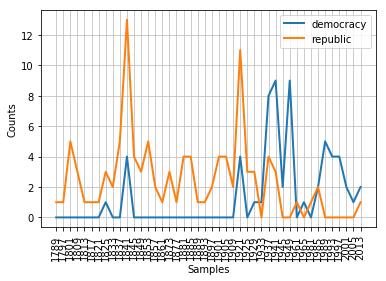

In [214]:
cfd = nltk.ConditionalFreqDist(
... (target, fileid[:4])
... for fileid in inaugural.fileids()
... for w in inaugural.words(fileid)
.

## Annotated Text Corpora
Many text corpora contain linguistic annotations, representing POS tags, named entities, syntactic structures, semantic
roles, and so forth. NLTK provides convenient ways to access several of these corpora, and has data packages containing
corpora and corpus samples, freely downloadable for use in teaching and research. 
For information about downloading them, see http://nltk.org/data. 
For more examples of how to access NLTK corpora, please consult the Corpus HOWTO at http://nltk.org/howto.

## Corpora in Other Languages
NLTK comes with corpora for many languages, though in some cases you will need to learn how to manipulate character
encodings in Python before using these corpora. 

In [225]:
nltk.corpus.cess_esp.words()

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [226]:
nltk.corpus.floresta.words()

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]

In [230]:
nltk.corpus.indian.words()

['মহিষের', 'সন্তান', ':', 'তোড়া', 'উপজাতি', '৷', ...]

In [232]:
nltk.corpus.udhr.fileids()[1:20]

['Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1']

In [233]:
nltk.corpus.udhr.words('Javanese-Latin1')[11:]

['Saben', 'umat', 'manungsa', 'lair', 'kanthi', 'hak', ...]

The last of these corpora, udhr, contains the Universal Declaration of Human Rights in over 300 languages. The fileids
for this corpus include information about the character encoding used in the file, such as UTF8 or Latin1. Let's use a
conditional frequency distribution to examine the differences in word lengths for a selection of languages included in the
udhr corpus. 

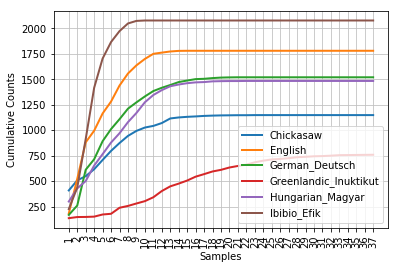

In [237]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch','Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist((lang, len(word)) for lang in languages for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

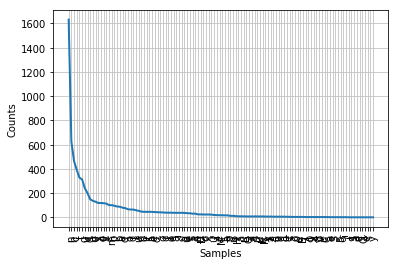

In [242]:
from nltk.corpus import udhr
languages = ['Vietnamese-UTF8']
raw_text = udhr.raw(languages)
nltk.FreqDist(raw_text).plot()

In [243]:
udhr.fileids()[283]

'Tzotzil-Latin1'

## Text Corpus Structure

### Basic Corpus Functionality defined in NLTK: more documentation can be found using help(nltk.corpus.reader) and by reading the online Corpus HOWTO at http://nltk.org/howto.



|Example |Description|
| -- | -- |
|fileids() |the files of the corpus|
|fileids([categories]) |the files of the corpus corresponding to these categories|
|categories() |the categories of the corpus|
|categories([fileids]) |the categories of the corpus corresponding to these files|
|raw() |the raw content of the corpus
|raw(fileids=[f1,f2,f3]) |the raw content of the specified files|
raw(categories=[c1,c2]) |the raw content of the specified categories|
words() |the words of the whole corpus|
words(fileids=[f1,f2,f3]) |the words of the specified fileids|
words(categories=[c1,c2]) |the words of the specified categories|
sents() |the sentences of the whole corpus|
sents(fileids=[f1,f2,f3]) |the sentences of the specified fileids|
sents(categories=[c1,c2]) |the sentences of the specified categories|
abspath(fileid) |the location of the given file on disk|
encoding(fileid) |the encoding of the file (if known)|
|open(fileid) |open a stream for reading the given corpus file|
|root |if the path to the root of locally installed corpus|
|readme() |the contents of the README file of the corpus|

In [246]:
raw = gutenberg.raw("burgess-busterbrown.txt")
raw[1:20]


'The Adventures of B'

In [247]:

words = gutenberg.words("burgess-busterbrown.txt")
words[1:20]


['The',
 'Adventures',
 'of',
 'Buster',
 'Bear',
 'by',
 'Thornton',
 'W',
 '.',
 'Burgess',
 '1920',
 ']',
 'I',
 'BUSTER',
 'BEAR',
 'GOES',
 'FISHING',
 'Buster',
 'Bear']

In [249]:
sents = gutenberg.sents("burgess-busterbrown.txt")
sents[1:10]

[['I'],
 ['BUSTER', 'BEAR', 'GOES', 'FISHING'],
 ['Buster',
  'Bear',
  'yawned',
  'as',
  'he',
  'lay',
  'on',
  'his',
  'comfortable',
  'bed',
  'of',
  'leaves',
  'and',
  'watched',
  'the',
  'first',
  'early',
  'morning',
  'sunbeams',
  'creeping',
  'through',
  'the',
  'Green',
  'Forest',
  'to',
  'chase',
  'out',
  'the',
  'Black',
  'Shadows',
  '.'],
 ['Once',
  'more',
  'he',
  'yawned',
  ',',
  'and',
  'slowly',
  'got',
  'to',
  'his',
  'feet',
  'and',
  'shook',
  'himself',
  '.'],
 ['Then',
  'he',
  'walked',
  'over',
  'to',
  'a',
  'big',
  'pine',
  '-',
  'tree',
  ',',
  'stood',
  'up',
  'on',
  'his',
  'hind',
  'legs',
  ',',
  'reached',
  'as',
  'high',
  'up',
  'on',
  'the',
  'trunk',
  'of',
  'the',
  'tree',
  'as',
  'he',
  'could',
  ',',
  'and',
  'scratched',
  'the',
  'bark',
  'with',
  'his',
  'great',
  'claws',
  '.'],
 ['After',
  'that',
  'he',
  'yawned',
  'until',
  'it',
  'seemed',
  'as',
  'if',
  'his',

## Loading your own Corpus
If we have our own collection of text files that we would like to access using the above methods, we can easily load
them with the help of NLTK's PlaintextCorpusReader. Check the location of our files on our file system; in the
following example, we have taken this to be the directory /usr/share/dict. Whatever the location, set this to be the value
of corpus_root . The second parameter of the PlaintextCorpusReader initializer can be a list of fileids, like
['a.txt', 'test/b.txt'], or a pattern that matches all fileids, like '[abc]/.*\.txt' 


<br>
<br>
from nltk.corpus import PlaintextCorpusReader<br>
corpus_root = '/usr/share/dict'<br>
wordlists = PlaintextCorpusReader(corpus_root, '.*')<br>
wordlists.fileids()
<br>
wordlists.words('connectives')


## Counting Words by Genre



In [251]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist((genre, word) for genre in brown.categories() for word in brown.words(categories=genre))
cfd

<ConditionalFreqDist with 15 conditions>

In [252]:
genre_word = [(genre, word) for genre in ['news', 'romance'] for word in brown.words(categories=genre)]
len(genre_word)

170576

In [253]:
genre_word[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [255]:
genre_word[4:20]

[('news', 'Jury'),
 ('news', 'said'),
 ('news', 'Friday'),
 ('news', 'an'),
 ('news', 'investigation'),
 ('news', 'of'),
 ('news', "Atlanta's"),
 ('news', 'recent'),
 ('news', 'primary'),
 ('news', 'election'),
 ('news', 'produced'),
 ('news', '``'),
 ('news', 'no'),
 ('news', 'evidence'),
 ('news', "''"),
 ('news', 'that')]

In [256]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd

<ConditionalFreqDist with 2 conditions>

In [257]:
cfd.conditions()

['news', 'romance']

In [258]:
print(cfd['news'])

<FreqDist with 14394 samples and 100554 outcomes>


In [259]:
print(cfd['romance'])

<FreqDist with 8452 samples and 70022 outcomes>


In [260]:
cfd['romance'].most_common(20)

[(',', 3899),
 ('.', 3736),
 ('the', 2758),
 ('and', 1776),
 ('to', 1502),
 ('a', 1335),
 ('of', 1186),
 ('``', 1045),
 ("''", 1044),
 ('was', 993),
 ('I', 951),
 ('in', 875),
 ('he', 702),
 ('had', 692),
 ('?', 690),
 ('her', 651),
 ('that', 583),
 ('it', 573),
 ('his', 559),
 ('she', 496)]

In [261]:
cfd['romance']['could']

193

# Plotting and Tabulating Distributions
Apart from combining two or more frequency distributions, and being easy to initialize, a ConditionalFreqDist provides
some useful methods for tabulation and plotting.
This code generates the pair ('america', '1865') for every instance of a word whose lowercased form
starts with america — such as Americans — in the file 1865-Lincoln.txt.

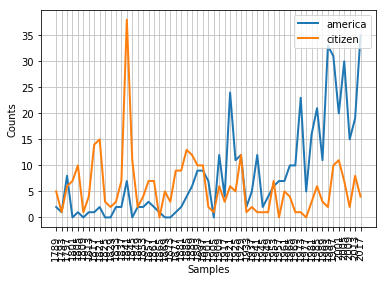

In [265]:
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist((target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target)).plot()

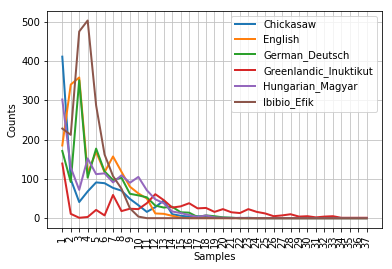

In [267]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch','Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist((lang, len(word))
for lang in languages
for word in udhr.words(lang + '-Latin1'))
cfd.plot()

we can tabulate the cumulative frequency data just for two
languages, and for words less than 10 characters long, as shown below. We interpret the last cell on the top row to mean
that 1,638 words of the English text have 9 or fewer letters.

In [268]:
cfd.tabulate(conditions=['English', 'German_Deutsch'],samples=range(10), cumulative=True)

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


In [270]:
cfd.tabulate(samples=['monday'])

                      monday 
            Chickasaw      0 
              English      0 
       German_Deutsch      0 
Greenlandic_Inuktikut      0 
     Hungarian_Magyar      0 
          Ibibio_Efik      0 


## Generating Random Text with Bigrams

We can use a conditional frequency distribution to create a table of bigrams (word pairs). The bigrams() function takes a list of words and builds a list of consecutive word pairs. Remember that, in order to see
the result and not a cryptic "generator object", we need to use the list() function:

In [271]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven','and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

In [273]:
def generate_model(cfdist, word, num=15):
    for i in range(num): 
        print(word, end=' ') 
        word = cfdist[word].max()
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [275]:
cfd['living']

FreqDist({'creature': 7, 'thing': 4, 'substance': 2, 'soul': 1, '.': 1, ',': 1})

In [276]:
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land 

# Python: Reusing Code

## Creating Programs with a Text Editor


The Python interactive interpreter performs your instructions as soon as you type them. Often, it is better to compose a
multi-line program using a text editor, then ask Python to run the whole program at once. Using IDLE, you can do this by
going to the File menu and opening a new window. Try this now, and enter the following one-line program:
print('Monty Python')
Save this program in a file called monty.py, then go to the Run menu, and select the command Run Module. (We'll learn
what modules are shortly.) The result in the main IDLE window should look like this:

In [278]:
from __future__ import division
def lexical_diversity(text): return len(text) / len(set(text))

In [280]:
def lexical_diversity(my_text_data):
    word_count = len(my_text_data)
    vocab_size = len(set(my_text_data))
    diversity_score = vocab_size / word_count
    return diversity_score

In [281]:
from nltk.corpus import genesis
kjv = genesis.words('english-kjv.txt')
lexical_diversity(kjv)

0.06230453042623537

The function plural() takes a singular noun and generates a plural form, though it is not always correct.

In [283]:
def plural(word):
    if word.endswith('y'):
        return word[:-1] + 'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh', 'ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'

In [285]:
plural('woman')

'women'

## Wordlist Corpora

In [287]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

In [288]:
unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))

['abbeyland',
 'abhorred',
 'abilities',
 'abounded',
 'abridgement',
 'abused',
 'abuses',
 'accents',
 'accepting',
 'accommodations',
 'accompanied',
 'accounted',
 'accounts',
 'accustomary',
 'aches',
 'acknowledging',
 'acknowledgment',
 'acknowledgments',
 'acquaintances',
 'acquiesced',
 'acquitted',
 'acquitting',
 'acted',
 'actions',
 'adapted',
 'adding',
 'additions',
 'addressed',
 'addresses',
 'addressing',
 'adhering',
 'adieus',
 'adjusting',
 'administering',
 'admirers',
 'admires',
 'admitting',
 'adorned',
 'advances',
 'advantages',
 'affairs',
 'affections',
 'affects',
 'affixed',
 'afflictions',
 'afforded',
 'affording',
 'ages',
 'agitated',
 'agonies',
 'ailments',
 'aimed',
 'alarms',
 'alienated',
 'alighted',
 'alleged',
 'allenham',
 'allowances',
 'allowed',
 'allowing',
 'alluded',
 'alterations',
 'altered',
 'altering',
 'amended',
 'amounted',
 'amusements',
 'ankles',
 'annamaria',
 'annexed',
 'announced',
 'announcing',
 'annuities',
 'annum',
 

In [290]:
unusual_words(nltk.corpus.nps_chat.words())

['aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'abortions',
 'abou',
 'abourted',
 'abs',
 'ack',
 'acros',
 'actualy',
 'adams',
 'adds',
 'adduser',
 'adjusts',
 'adoted',
 'adreniline',
 'ads',
 'adults',
 'afe',
 'affairs',
 'affari',
 'affects',
 'afk',
 'agaibn',
 'ages',
 'aggravated',
 'agurlwithbigguns',
 'ahah',
 'ahahah',
 'ahahh',
 'ahahha',
 'ahh',
 'ahhah',
 'ahhahahaha',
 'ahhh',
 'ahhhh',
 'ahhhhhh',
 'ahhhhhhhhhhhhhh',
 'aiiiiiiiiiiiiiiiiiiiiiiii',
 'aiken',
 'aime',
 'akdt',
 'akon',
 'akron',
 'akst',
 'aligator',
 'allergies',
 'allo',
 'allowed',
 'aloha',
 'alohaaa',
 'alohas',
 'alot',
 'alotta',
 'alternatives',
 'alterz',
 'alwys',
 'alzheimers',
 'amazingness',
 'americans',
 'anithing',
 'ans',
 'answering',
 'answers',
 'antidepressants',
 'anygirl',
 'anymore',
 'anythin',
 'anytime',
 'anyyyyyyyyyyyyyyyyy',
 'aok',
 'apoligize',
 'appearently',
 'appears',
 'applaudes',
 'appleton',
 'appologise',
 'appologize',
 'aqwesome',
 'arggghhh',
 'argh',
 'armtnpeat',
 'arres

In [291]:
from nltk.corpus import stopwords

In [292]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Let's define a function to compute what fraction of words in a text are not in the stopwords list:

In [293]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)
content_fraction(nltk.corpus.reuters.words())

0.735240435097661

A wordlist is useful for solving word puzzles. Our program iterates through every word and, for
each one, checks whether it meets the conditions. It is easy to check obligatory letter and length constraints (and
we'll only look for words with six or more letters here). It is trickier to check that candidate solutions only use
combinations of the supplied letters, especially since some of the supplied letters appear twice (here, the letter v). The
FreqDist comparison method permits us to check that the frequency of each letter in the candidate word is less than or
equal to the frequency of the corresponding letter in the puzzle.

In [294]:
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()
[w for w in wordlist if len(w) >= 6
and obligatory in w
and nltk.FreqDist(w) <= puzzle_letters]

['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

One more wordlist corpus is the Names corpus, containing 8,000 first names categorized by gender. The male and female
names are stored in separate files. Let's find names which appear in both files, i.e. names that are ambiguous for gender:

In [295]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

In [296]:
male_names = names.words('male.txt')

In [297]:
female_names = names.words('female.txt')
[w for w in male_names if w in female_names]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

It should be noticed that names ending in the letter a are almost always female. We can see this and some other patterns in
the following graph. 

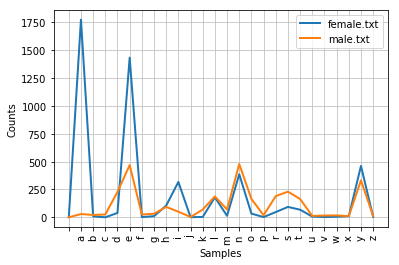

In [298]:
cfd = nltk.ConditionalFreqDist((fileid, name[-1]) for fileid in names.fileids() for name in names.words(fileid))
cfd.plot()

## A Pronouncing Dictionary
A slightly richer kind of lexical resource is a table (or spreadsheet), containing a word plus some properties in each row.
NLTK includes the CMU Pronouncing Dictionary for US English, which was designed for use by speech synthesizers.

In [299]:
entries = nltk.corpus.cmudict.entries()
len(entries)



133737

In [300]:
for entry in entries[42371:42379]:
    print(entry)

('fir', ['F', 'ER1'])
('fire', ['F', 'AY1', 'ER0'])
('fire', ['F', 'AY1', 'R'])
('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M'])
('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M'])
('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z'])
('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z'])
('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])


In [305]:
for word, pron in entries:
    if len(pron) == 3: 
        ph1, ph2, ph3 = pron
        if ph1 == 'P' and ph3 == 'T':
            print(word, ph2, end=' ')

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1 

In [306]:
syllable = ['N', 'IH0', 'K', 'S']
[word for word, pron in entries if pron[-4:] == syllable]

["atlantic's",
 'audiotronics',
 'avionics',
 'beatniks',
 'calisthenics',
 'centronics',
 'chamonix',
 'chetniks',
 "clinic's",
 'clinics',
 'conics',
 'conics',
 'cryogenics',
 'cynics',
 'diasonics',
 "dominic's",
 'ebonics',
 'electronics',
 "electronics'",
 "endotronics'",
 'endotronics',
 'enix',
 'environics',
 'ethnics',
 'eugenics',
 'fibronics',
 'flextronics',
 'harmonics',
 'hispanics',
 'histrionics',
 'identics',
 'ionics',
 'kibbutzniks',
 'lasersonics',
 'lumonics',
 'mannix',
 'mechanics',
 "mechanics'",
 'microelectronics',
 'minix',
 'minnix',
 'mnemonics',
 'mnemonics',
 'molonicks',
 'mullenix',
 'mullenix',
 'mullinix',
 'mulnix',
 "munich's",
 'nucleonics',
 'onyx',
 'organics',
 "panic's",
 'panics',
 'penix',
 'pennix',
 'personics',
 'phenix',
 "philharmonic's",
 'phoenix',
 'phonics',
 'photronics',
 'pinnix',
 'plantronics',
 'pyrotechnics',
 'refuseniks',
 "resnick's",
 'respironics',
 'sconnix',
 'siliconix',
 'skolniks',
 'sonics',
 'sputniks',
 'technics

In [307]:
[w for w, pron in entries if pron[-1] == 'M' and w[-1] == 'n']

['autumn', 'column', 'condemn', 'damn', 'goddamn', 'hymn', 'solemn']

In [308]:
sorted(set(w[:2] for w, pron in entries if pron[0] == 'N' and w[0] != 'n'))

['gn', 'kn', 'mn', 'pn']

In [309]:
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]

In [313]:
[w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']][1:20]

['abbreviated',
 'abbreviating',
 'accelerated',
 'accelerating',
 'accelerator',
 'accelerators',
 'accentuated',
 'accentuating',
 'accommodated',
 'accommodating',
 'accommodative',
 'accumulated',
 'accumulating',
 'accumulative',
 'accumulator',
 'accumulators',
 'accusatory',
 'adenovirus',
 'adjudicated']

In [312]:
[w for w, pron in entries if stress(pron) == ['0', '2', '0', '1', '0']][1:20]

['abbreviations',
 'abomination',
 'abortifacient',
 'abortifacients',
 'academicians',
 'accommodation',
 'accommodations',
 'accreditation',
 'accreditations',
 'accumulation',
 'accumulations',
 'acetylcholine',
 'acetylcholine',
 'adjudication',
 'administration',
 "administration's",
 'administrations',
 "administrations'",
 'aduliadae']

A subtlety of the above program is that our user-defined function stress() is invoked inside the
condition of a list comprehension. There is also a doubly-nested for loop. There's a lot going on here
and you might want to return to this once you've had more experience using list comprehensions.

In [314]:
p3 = [(pron[0]+'-'+pron[2], word)
     for (word, pron) in entries
     if pron[0] == 'P' and len(pron) == 3]

In [315]:
cfd = nltk.ConditionalFreqDist(p3)

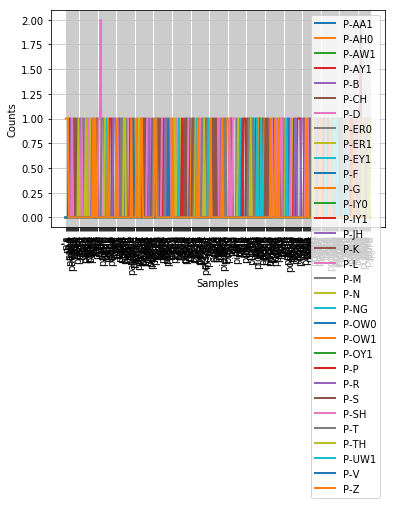

In [316]:
cfd.plot()

In [318]:
for template in sorted(cfd.conditions()):
    if len(cfd[template]) > 10:
        words = sorted(cfd[template])
        wordstring = ' '.join(words)
        print(template, wordstring[:70] + "...")

P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk ...
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearl...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn...
P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett...
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh...
P-Z p's p.'s p.s pais paiz pao's pas pause paws pays paz peas pease pei's ...


 We look up a dictionary by giving its name
followed by a key (such as the word 'fire') inside square brackets

In [319]:
prondict = nltk.corpus.cmudict.dict()
prondict['fire']

[['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']]

In [320]:
prondict['blog'] = [['B', 'L', 'AA1', 'G']]

In [321]:
prondict['blog']

[['B', 'L', 'AA1', 'G']]

the following text-to-speech function looks up each word of the text in the
pronunciation dictionary

In [322]:
text = ['natural', 'language', 'processing']
[ph for w in text for ph in prondict[w][0]]

['N',
 'AE1',
 'CH',
 'ER0',
 'AH0',
 'L',
 'L',
 'AE1',
 'NG',
 'G',
 'W',
 'AH0',
 'JH',
 'P',
 'R',
 'AA1',
 'S',
 'EH0',
 'S',
 'IH0',
 'NG']

## Comparative Wordlists

Another example of a tabular lexicon is the comparative wordlist. NLTK includes so-called Swadesh wordlists, lists of
about 200 common words in several languages. The languages are identified using an ISO 639 two-letter code.

In [325]:
from nltk.corpus import swadesh
swadesh.fileids()

['be',
 'bg',
 'bs',
 'ca',
 'cs',
 'cu',
 'de',
 'en',
 'es',
 'fr',
 'hr',
 'it',
 'la',
 'mk',
 'nl',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'sr',
 'sw',
 'uk']

In [326]:
swadesh.words('en')

['I',
 'you (singular), thou',
 'he',
 'we',
 'you (plural)',
 'they',
 'this',
 'that',
 'here',
 'there',
 'who',
 'what',
 'where',
 'when',
 'how',
 'not',
 'all',
 'many',
 'some',
 'few',
 'other',
 'one',
 'two',
 'three',
 'four',
 'five',
 'big',
 'long',
 'wide',
 'thick',
 'heavy',
 'small',
 'short',
 'narrow',
 'thin',
 'woman',
 'man (adult male)',
 'man (human being)',
 'child',
 'wife',
 'husband',
 'mother',
 'father',
 'animal',
 'fish',
 'bird',
 'dog',
 'louse',
 'snake',
 'worm',
 'tree',
 'forest',
 'stick',
 'fruit',
 'seed',
 'leaf',
 'root',
 'bark (from tree)',
 'flower',
 'grass',
 'rope',
 'skin',
 'meat',
 'blood',
 'bone',
 'fat (noun)',
 'egg',
 'horn',
 'tail',
 'feather',
 'hair',
 'head',
 'ear',
 'eye',
 'nose',
 'mouth',
 'tooth',
 'tongue',
 'fingernail',
 'foot',
 'leg',
 'knee',
 'hand',
 'wing',
 'belly',
 'guts',
 'neck',
 'back',
 'breast',
 'heart',
 'liver',
 'drink',
 'eat',
 'bite',
 'suck',
 'spit',
 'vomit',
 'blow',
 'breathe',
 'laugh',

In [327]:
fr2en = swadesh.entries(['fr', 'en'])
fr2en

[('je', 'I'),
 ('tu, vous', 'you (singular), thou'),
 ('il', 'he'),
 ('nous', 'we'),
 ('vous', 'you (plural)'),
 ('ils, elles', 'they'),
 ('ceci', 'this'),
 ('cela', 'that'),
 ('ici', 'here'),
 ('là', 'there'),
 ('qui', 'who'),
 ('quoi', 'what'),
 ('où', 'where'),
 ('quand', 'when'),
 ('comment', 'how'),
 ('ne...pas', 'not'),
 ('tout', 'all'),
 ('plusieurs', 'many'),
 ('quelques', 'some'),
 ('peu', 'few'),
 ('autre', 'other'),
 ('un', 'one'),
 ('deux', 'two'),
 ('trois', 'three'),
 ('quatre', 'four'),
 ('cinq', 'five'),
 ('grand', 'big'),
 ('long', 'long'),
 ('large', 'wide'),
 ('épais', 'thick'),
 ('lourd', 'heavy'),
 ('petit', 'small'),
 ('court', 'short'),
 ('étroit', 'narrow'),
 ('mince', 'thin'),
 ('femme', 'woman'),
 ('homme', 'man (adult male)'),
 ('homme', 'man (human being)'),
 ('enfant', 'child'),
 ('femme, épouse', 'wife'),
 ('mari, époux', 'husband'),
 ('mère', 'mother'),
 ('père', 'father'),
 ('animal', 'animal'),
 ('poisson', 'fish'),
 ('oiseau', 'bird'),
 ('chien', 'dog'

In [328]:
translate = dict(fr2en)

In [331]:
translate['chien']

'dog'

We can make our simple translator more useful by adding other source languages. Let's get the German-English and
Spanish-English pairs, convert each to a dictionary using dict(), then update our original translate dictionary with these
additional mappings:

In [332]:
de2en = swadesh.entries(['de', 'en']) # German-English
es2en = swadesh.entries(['es', 'en']) # Spanish-English
translate.update(dict(de2en))
translate.update(dict(es2en))
translate['Hund']

'dog'

We can compare words in various Germanic and Romance languages:

In [335]:
languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
for i in [139, 140, 141, 142]: print(swadesh.entries(languages)[i])

('say', 'sagen', 'zeggen', 'decir', 'dire', 'dizer', 'dicere')
('sing', 'singen', 'zingen', 'cantar', 'chanter', 'cantar', 'canere')
('play', 'spielen', 'spelen', 'jugar', 'jouer', 'jogar, brincar', 'ludere')
('float', 'schweben', 'zweven', 'flotar', 'flotter', 'flutuar, boiar', 'fluctuare')


## Shoebox and Toolbox Lexicons
Perhaps the single most popular tool used by linguists for managing data is Toolbox, previously known as Shoebox since
it replaces the field linguist's traditional shoebox full of file cards. Toolbox is freely downloadable from
http://www.sil.org/computing/toolbox/.
A Toolbox file consists of a collection of entries, where each entry is made up of one or more fields. Most fields are
optional or repeatable, which means that this kind of lexical resource cannot be treated as a table or spreadsheet.
Here is a dictionary for the Rotokas language. We see just the first entry, for the word kaa meaning "to gag":

In [338]:
from nltk.corpus import toolbox

In [339]:
toolbox.entries('rotokas.dic')

[('kaa',
  [('ps', 'V'),
   ('pt', 'A'),
   ('ge', 'gag'),
   ('tkp', 'nek i pas'),
   ('dcsv', 'true'),
   ('vx', '1'),
   ('sc', '???'),
   ('dt', '29/Oct/2005'),
   ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   ('xe', 'Apoka is gagging from food while talking.')]),
 ('kaa',
  [('ps', 'V'),
   ('pt', 'B'),
   ('ge', 'strangle'),
   ('tkp', 'pasim nek'),
   ('arg', 'O'),
   ('vx', '2'),
   ('dt', '07/Oct/2006'),
   ('ex', 'Rera rauroro rera kaarevoi.'),
   ('xp', 'Em i holim pas em na nekim em.'),
   ('xe', 'He is holding him and strangling him.'),
   ('ex', 'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'),
   ('xp', 'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'),
   ('xe',
    "They strangled the man's neck with rope because he was very stubborn and arrogant."),
   ('ex',
    'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'),
 

Entries consist of a series of attribute-value pairs, like ('ps', 'V') to indicate that the part-of-speech is 'V' (verb), and
('ge', 'gag') to indicate that the gloss-into-English is 'gag'. The last three pairs contain an example sentence in
Rotokas and its translations into Tok Pisin and English.



*The Rotokas language is spoken on the island of Bougainville, Papua New Guinea. This lexicon was
contributed to NLTK by Stuart Robinson. Rotokas is notable for having an inventory of just 12
phonemes (contrastive sounds), http://en.wikipedia.org/wiki/Rotokas_language*

## WordNet
WordNet is a semantically-oriented dictionary of English, similar to a traditional thesaurus but with a richer structure.
NLTK includes the English WordNet, with 155,287 words and 117,659 synonym sets. We'll begin by looking at
synonyms and how they are accessed in WordNet.

In [341]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

The entity
car.n.01 is called a synset, or "synonym set", a collection of synonymous words (or "lemmas")

In [342]:
wn.synset('car.n.01').lemma_names()


['car', 'auto', 'automobile', 'machine', 'motorcar']

In [343]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [344]:
 wn.synset('car.n.01').examples()

['he needs a car to get to work']

In [345]:
wn.synset('car.n.01').lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [346]:
wn.lemma('car.n.01.automobile')

Lemma('car.n.01.automobile')

In [347]:
wn.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

In [348]:
wn.lemma('car.n.01.automobile').name()

'automobile'

In [349]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [350]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


For convenience, we can access all the lemmas involving the word car as follows.

In [351]:
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

## The WordNet Hierarchy
WordNet synsets correspond to abstract concepts, and they don't always have corresponding words in English. These
concepts are linked together in a hierarchy. Some concepts are very general, such as Entity, State, Event — these are
called unique beginners or root synsets. Others, such as gas guzzler and hatchback, are much more specific. <br>
WordNet makes it easy to navigate between concepts. For example, given a concept like motorcar, we can look at the
concepts that are more specific; the (immediate) hyponyms

In [352]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[0]

Synset('ambulance.n.01')

In [353]:
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

We can also navigate up the hierarchy by visiting hypernyms. Some words have multiple paths, because they can be
classified in more than one way. There are two paths between car.n.01 and entity.n.01 because wheeled_vehicle.n.01
can be classified as both a vehicle and a container.

In [355]:
motorcar.hypernyms()
paths = motorcar.hypernym_paths()
len(paths)
[synset.name() for synset in paths[0]]
[synset.name() for synset in paths[1]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'conveyance.n.03',
 'vehicle.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [356]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]

## More Lexical Relations
Hypernyms and hyponyms are called lexical relations because they relate one synset to another. These two relations
navigate up and down the "is-a" hierarchy. Another important way to navigate the WordNet network is from items to their
components (meronyms) or to the things they are contained in (holonyms). For example, the parts of a tree are its trunk,
crown, and so on; the part_meronyms(). The substance a tree is made of includes heartwood and sapwood; the
substance_meronyms(). A collection of trees forms a forest; the member_holonyms():

In [360]:
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [361]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [362]:
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]